In [ ]:
%matplotlib inline
bs= 32
version= 5

In [ ]:
from fastai.vision.all import *
import torch
from pathlib import Path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Footwear Recognizer-Project 02

/content/drive/MyDrive/Footwear Recognizer-Project 02


In [ ]:
# Set the path to dataset
path = Path("/content/drive/MyDrive/Footwear Recognizer-Project 02/footwear_data")
print(f"Dataset path: {path}")

Dataset path: /content/drive/MyDrive/Footwear Recognizer-Project 02/footwear_data


In [ ]:
footwear_dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,        # get all images
    splitter=RandomSplitter(valid_pct=0.2, seed=42),  # 80/20 split
    get_y=parent_label,               # label = folder name
    item_tfms=Resize(224),            # resize all images to 224x224
    batch_tfms=aug_transforms(        # data augmentation
        flip_vert=False,
        max_rotate=15,
        max_zoom=1.1,
        max_lighting=0.2,
        max_warp=0.2
    )
)

In [ ]:
dls = footwear_dblock.dataloaders(path, bs=32)

# Path to save DataLoaders
dls_save_path = Path("/content/drive/MyDrive/Footwear Recognizer-Project 02/Dataloaders")

# Save the DataLoaders
torch.save(dls, dls_save_path / f"footwear_dataloaders_v{version}.pkl")
print(f"✅ DataLoaders saved at: {dls_save_path}/footwear_dataloaders_v{version}.pkl")

✅ DataLoaders saved at: /content/drive/MyDrive/Footwear Recognizer-Project 02/Dataloaders/footwear_dataloaders_v5.pkl


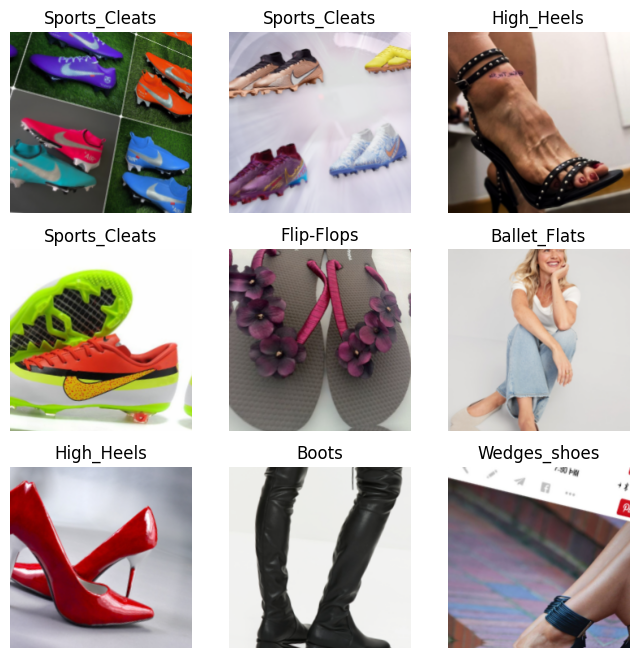

In [ ]:
dls.train.show_batch(max_n=9, figsize=(8,8))

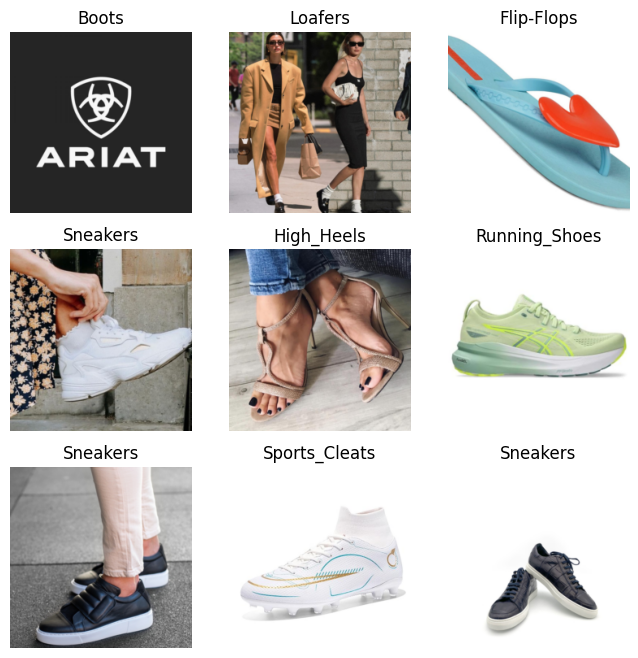

In [ ]:
dls.valid.show_batch(max_n=9, figsize=(8,8))

In [ ]:
# Create a CNN learner
learn = vision_learner(
    dls,
    resnet34,
    metrics=[accuracy, error_rate]
)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:00<00:00, 165MB/s]


In [ ]:
# Fine-tune for 5 epochs
learn.fine_tune(5)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in by

In [ ]:
# Save the model as a pkl with version
model_version = 4
learn.export(f"footwear_model_v{model_version}.pkl")
print(f"Model exported as footwear_model_v{model_version}.pkl")


Model exported as footwear_model_v4.pkl


In [ ]:
# Save the model with version
model_version = 4
learn.save(f"footwear_model_v{model_version}")
print(f"Model saved as footwear_model_v{model_version}.pth")

Model saved as footwear_model_v4.pth


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


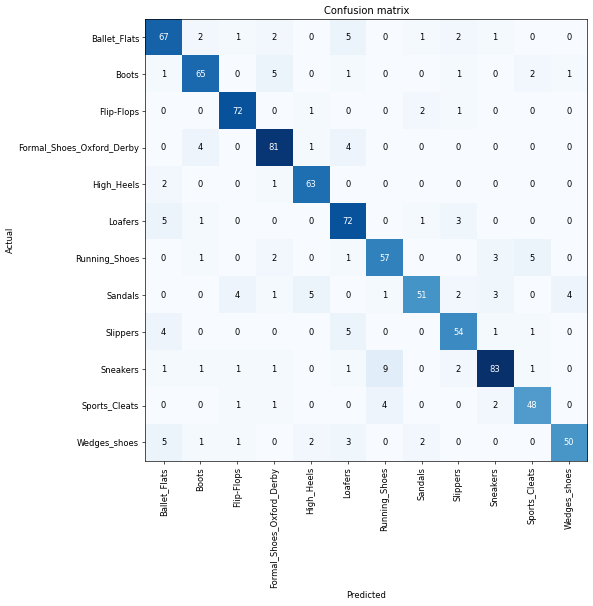

In [ ]:
# Get the interpretation object
interp = ClassificationInterpretation.from_learner(learn)

# Confusion matrix
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

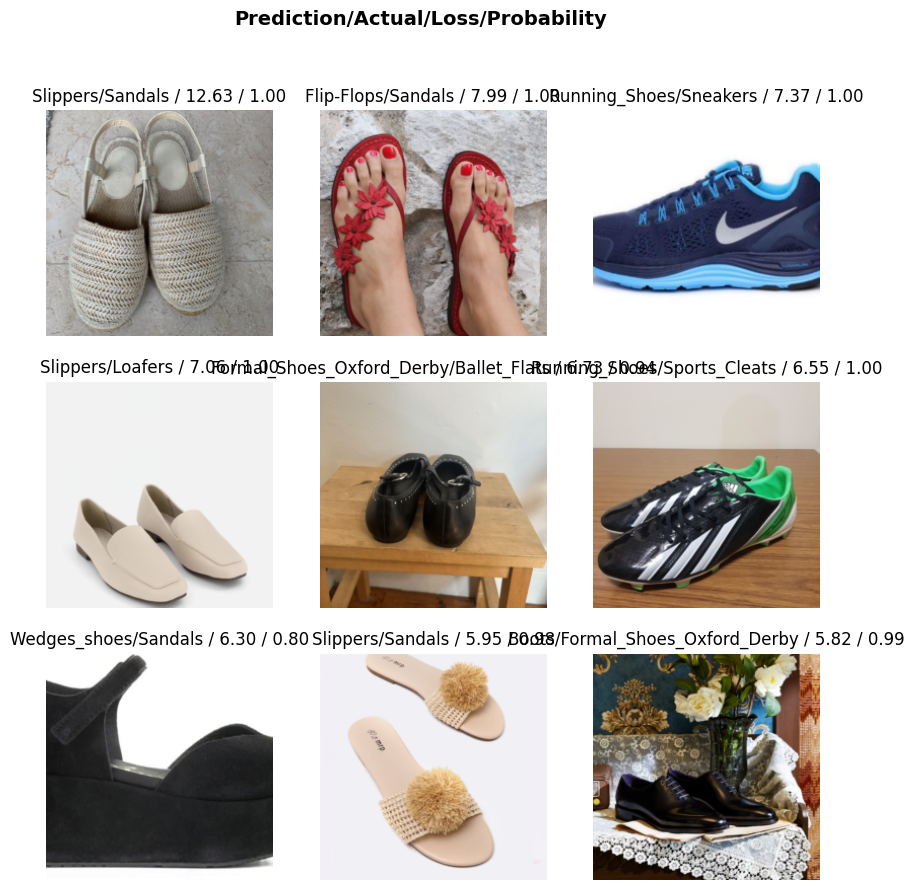

In [ ]:
interp.plot_top_losses(9, figsize=(10,10))

In [ ]:
from fastai.vision.widgets import *

In [ ]:
cleaner= ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
cleaner.delete()

(#2) [3,7]

In [ ]:
import os

for idx in cleaner.delete():
    file_path = cleaner.fns[idx]
    if os.path.exists(file_path):
        os.remove(file_path)
        print(f"Deleted: {file_path}")
    else:
        print(f"Already gone: {file_path}")

Deleted: /content/drive/MyDrive/Footwear Recognizer-Project 02/footwear_data/Sandals/Image_419.jpg
Deleted: /content/drive/MyDrive/Footwear Recognizer-Project 02/footwear_data/Sandals/Image_362.jpeg
